# The Global Terrorism Database

#### Analyzing Terror Events

The Global Terrorism Database, organized by 

In [2]:
## Imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [12,8]

In [3]:
## Looking at my options.
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [4]:
## Read in data, take a peek.
data = pd.read_csv('../globalterrorismdb_0617dist.csv')
data.head()

/Users/chaimgluck/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data.shape

(170350, 135)

In [6]:
## So many columns! I'll pare down the scope for this project.
list(data)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [7]:
## List of columns that I want.
cols_to_keep = 'eventid iyear imonth iday summary country country_txt region region_txt provstate latitude longitude attacktype1 attacktype1_txt success suicide weaptype1 weaptype1_txt weapsubtype1 weapsubtype1_txt targtype1 targtype1_txt natlty1 natlty1_txt gname nperps nkill nkillus nkillter nwound nwoundus nwoundte propextent'.split()

## Keep those columns
data = data[cols_to_keep]

In [8]:
## A more manageable amount of variables for the scope of this project.
data.shape

(170350, 33)

In [9]:
## Still a ton of nulls. Many of the primary columns that I want to work with are clear of nulls, so I'll keep 
## them for now.
data.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
summary              66138
country                  0
country_txt              0
region                   0
region_txt               0
provstate            14502
latitude              4606
longitude             4606
attacktype1              0
attacktype1_txt          0
success                  0
suicide                  0
weaptype1                0
weaptype1_txt            0
weapsubtype1         19426
weapsubtype1_txt     19426
targtype1                0
targtype1_txt            0
natlty1               1394
natlty1_txt           1394
gname                    0
nperps               71124
nkill                 9682
nkillus              64459
nkillter             66663
nwound               15325
nwoundus             64710
nwoundte             68749
propextent          109805
dtype: int64

In [10]:
## According to the codebook, the first 8 numbers are the date. 
data.eventid.head(10)

0    197000000001
1    197000000002
2    197001000001
3    197001000002
4    197001000003
5    197001010002
6    197001020001
7    197001020002
8    197001020003
9    197001030001
Name: eventid, dtype: int64

In [11]:
## Beginning to create a date column.
data['date'] = data.eventid

In [12]:
## It's an int.
data.date.dtype

dtype('int64')

In [13]:
## Change to string for slicing and dicing.
data['date'] = [str(x)[0:8] for x in data['date']]

In [14]:
## Turn to datetime, drop nulls.
data.date = pd.to_datetime(data.date, errors='coerce')
data.dropna(axis=0, subset=['date'], inplace=True)
data.date.isnull().sum()

0

In [15]:
## Drop those other date-like columns.
data.drop(['eventid', 'iyear', 'imonth', 'iday'], axis=1, inplace=True)

In [16]:
## Set date as index.
data.set_index('date', inplace=True)

In [17]:
## Indexed by date.
data.head()

,summary,country,country_txt,region,region_txt,provstate,latitude,longitude,attacktype1,attacktype1_txt,...,natlty1_txt,gname,nperps,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,propextent
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,1/1/1970: Unknown African American assailants ...,217,United States,1,North America,Illinois,37.005105,-89.176269,2,Armed Assault,...,United States,Black Nationalists,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1970-01-02,NaN,218,Uruguay,3,South America,Montevideo,-34.891151,-56.187214,1,Assassination,...,Uruguay,Tupamaros (Uruguay),3.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
1970-01-02,1/2/1970: Unknown perpetrators detonated explo...,217,United States,1,North America,California,37.805065,-122.273024,3,Bombing/Explosion,...,United States,Unknown,-99.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1970-01-02,"1/2/1970: Karl Armstrong, a member of the New ...",217,United States,1,North America,Wisconsin,43.076592,-89.412488,7,Facility/Infrastructure Attack,...,United States,New Year's Gang,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1970-01-03,"1/3/1970: Karl Armstrong, a member of the New ...",217,United States,1,North America,Wisconsin,43.072950,-89.386694,7,Facility/Infrastructure Attack,...,United States,New Year's Gang,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


## Part 1: EDA

In [18]:
## There are far more of type 3, which is bombings, than any other.
data.attacktype1.value_counts()

3    82794
2    40148
1    18281
6    10143
7     9505
9     6360
8      910
5      896
4      595
Name: attacktype1, dtype: int64

In [19]:
## Percentage of attacks that succeeded for each category.
pd.crosstab(data.attacktype1_txt, data.success, normalize='index')

success,0,1
attacktype1_txt,,
Armed Assault,0.048271,0.951729
Assassination,0.232865,0.767135
Bombing/Explosion,0.114586,0.885414
Facility/Infrastructure Attack,0.057338,0.942662
Hijacking,0.122689,0.877311
Hostage Taking (Barricade Incident),0.008929,0.991071
Hostage Taking (Kidnapping),0.022577,0.977423
Unarmed Assault,0.141758,0.858242
Unknown,0.143868,0.856132


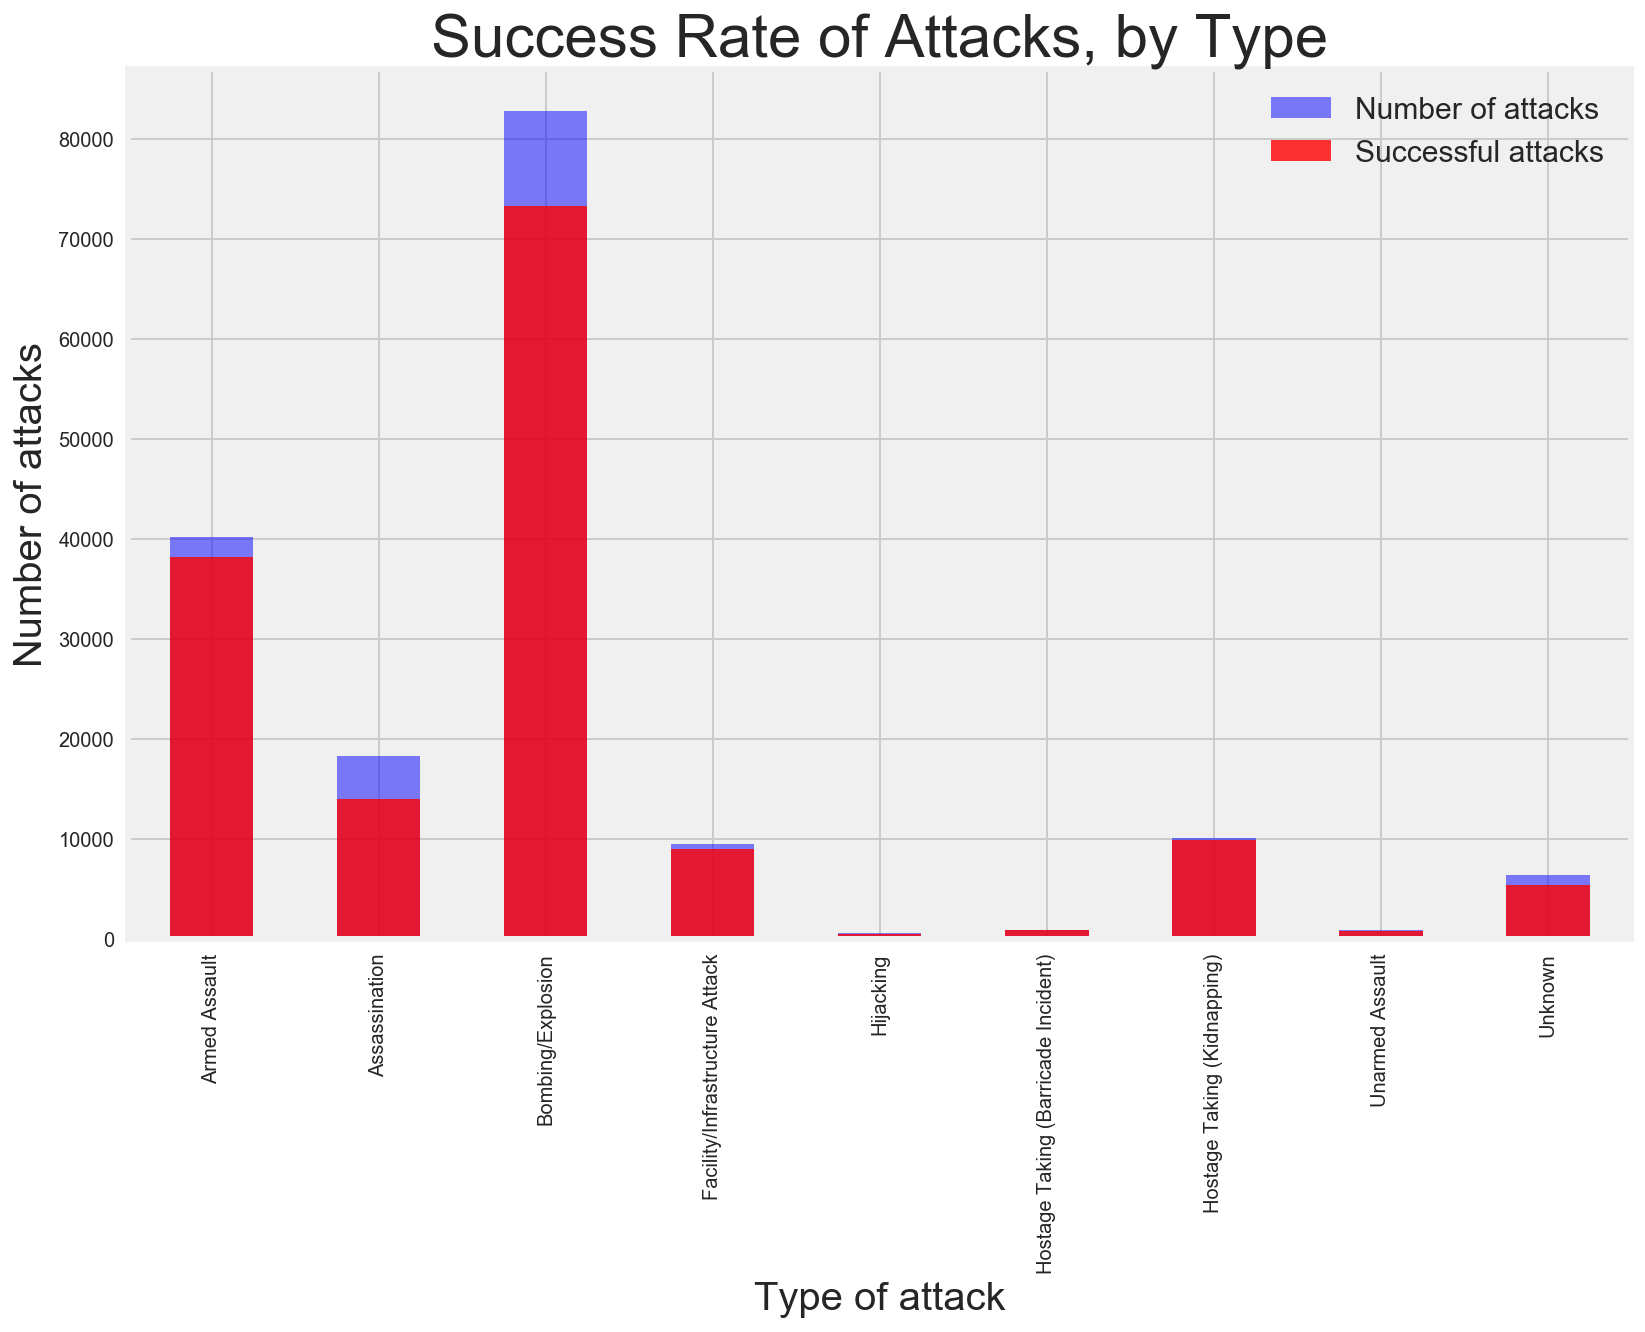

In [20]:
data.groupby('attacktype1_txt').success.count().plot(kind='bar', color='b', label='Number of attacks', alpha=0.5)
data.groupby('attacktype1_txt').success.sum().plot(kind='bar', color='r', label='Successful attacks', alpha=0.8)
plt.legend(loc='upper right', fontsize=15)
plt.xlabel('Type of attack', fontsize=20)
plt.ylabel('Number of attacks', fontsize=20)
plt.title('Success Rate of Attacks, by Type', fontsize=30)
plt.savefig('Success-rates-by-type')

In [21]:
## EDA function. There is tons of missing data.
def eda(df):
    print 'Missing values: \n', df.isnull().sum()
    print 'Data Types: \n', df.dtypes
    print 'Shape: \n', df.shape
    print 'Summary Statistics: \n', df.describe()
    for item in df:
        print item
        print df[item].nunique()

eda(data)

Missing values: 
summary              65532
country                  0
country_txt              0
region                   0
region_txt               0
provstate            14386
latitude              4524
longitude             4524
attacktype1              0
attacktype1_txt          0
success                  0
suicide                  0
weaptype1                0
weaptype1_txt            0
weapsubtype1         19156
weapsubtype1_txt     19156
targtype1                0
targtype1_txt            0
natlty1               1376
natlty1_txt           1376
gname                    0
nperps               70535
nkill                 9524
nkillus              63867
nkillter             66077
nwound               15155
nwoundus             64118
nwoundte             68148
propextent          109303
dtype: int64
Data Types: 
summary              object
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
latitu

In [22]:
## New dataframe that only includes bombings.
bombings = data[data.attacktype1 == 3]

In [508]:
## Shape.
bombings.shape

(82794, 29)

In [509]:
## Still lots of missing values, but it's more manageable. Them most important columns for our purposes are good.
eda(bombings)

Missing values: 
summary             27355
country                 0
country_txt             0
region                  0
region_txt              0
provstate            4570
latitude             1388
longitude            1388
attacktype1             0
attacktype1_txt         0
success                 0
suicide                 0
weaptype1               0
weaptype1_txt           0
weapsubtype1          478
weapsubtype1_txt      478
targtype1               0
targtype1_txt           0
natlty1               992
natlty1_txt           992
gname                   0
nperps              33498
nkill                3756
nkillus             26684
nkillter            27383
nwound               5283
nwoundus            26846
nwoundte            27990
propextent          46349
dtype: int64
Data Types: 
summary              object
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
latitude            float64
longitu

In [510]:
## Bombings by region. Middle East and North Africa predominates.
bombings.region_txt.value_counts()

Middle East & North Africa     28267
South Asia                     19811
South America                   8953
Western Europe                  8319
Sub-Saharan Africa              4907
Southeast Asia                  4464
Central America & Caribbean     3219
Eastern Europe                  2719
North America                   1513
East Asia                        321
Central Asia                     231
Australasia & Oceania             70
Name: region_txt, dtype: int64

In [511]:
## Success of bombings, by region.
pd.crosstab(bombings.region_txt, bombings.success, normalize='index')

success,0,1
region_txt,,
Australasia & Oceania,0.114286,0.885714
Central America & Caribbean,0.039143,0.960857
Central Asia,0.073593,0.926407
East Asia,0.143302,0.856698
Eastern Europe,0.119161,0.880839
Middle East & North Africa,0.095730,0.904270
North America,0.214805,0.785195
South America,0.087233,0.912767
South Asia,0.143102,0.856898


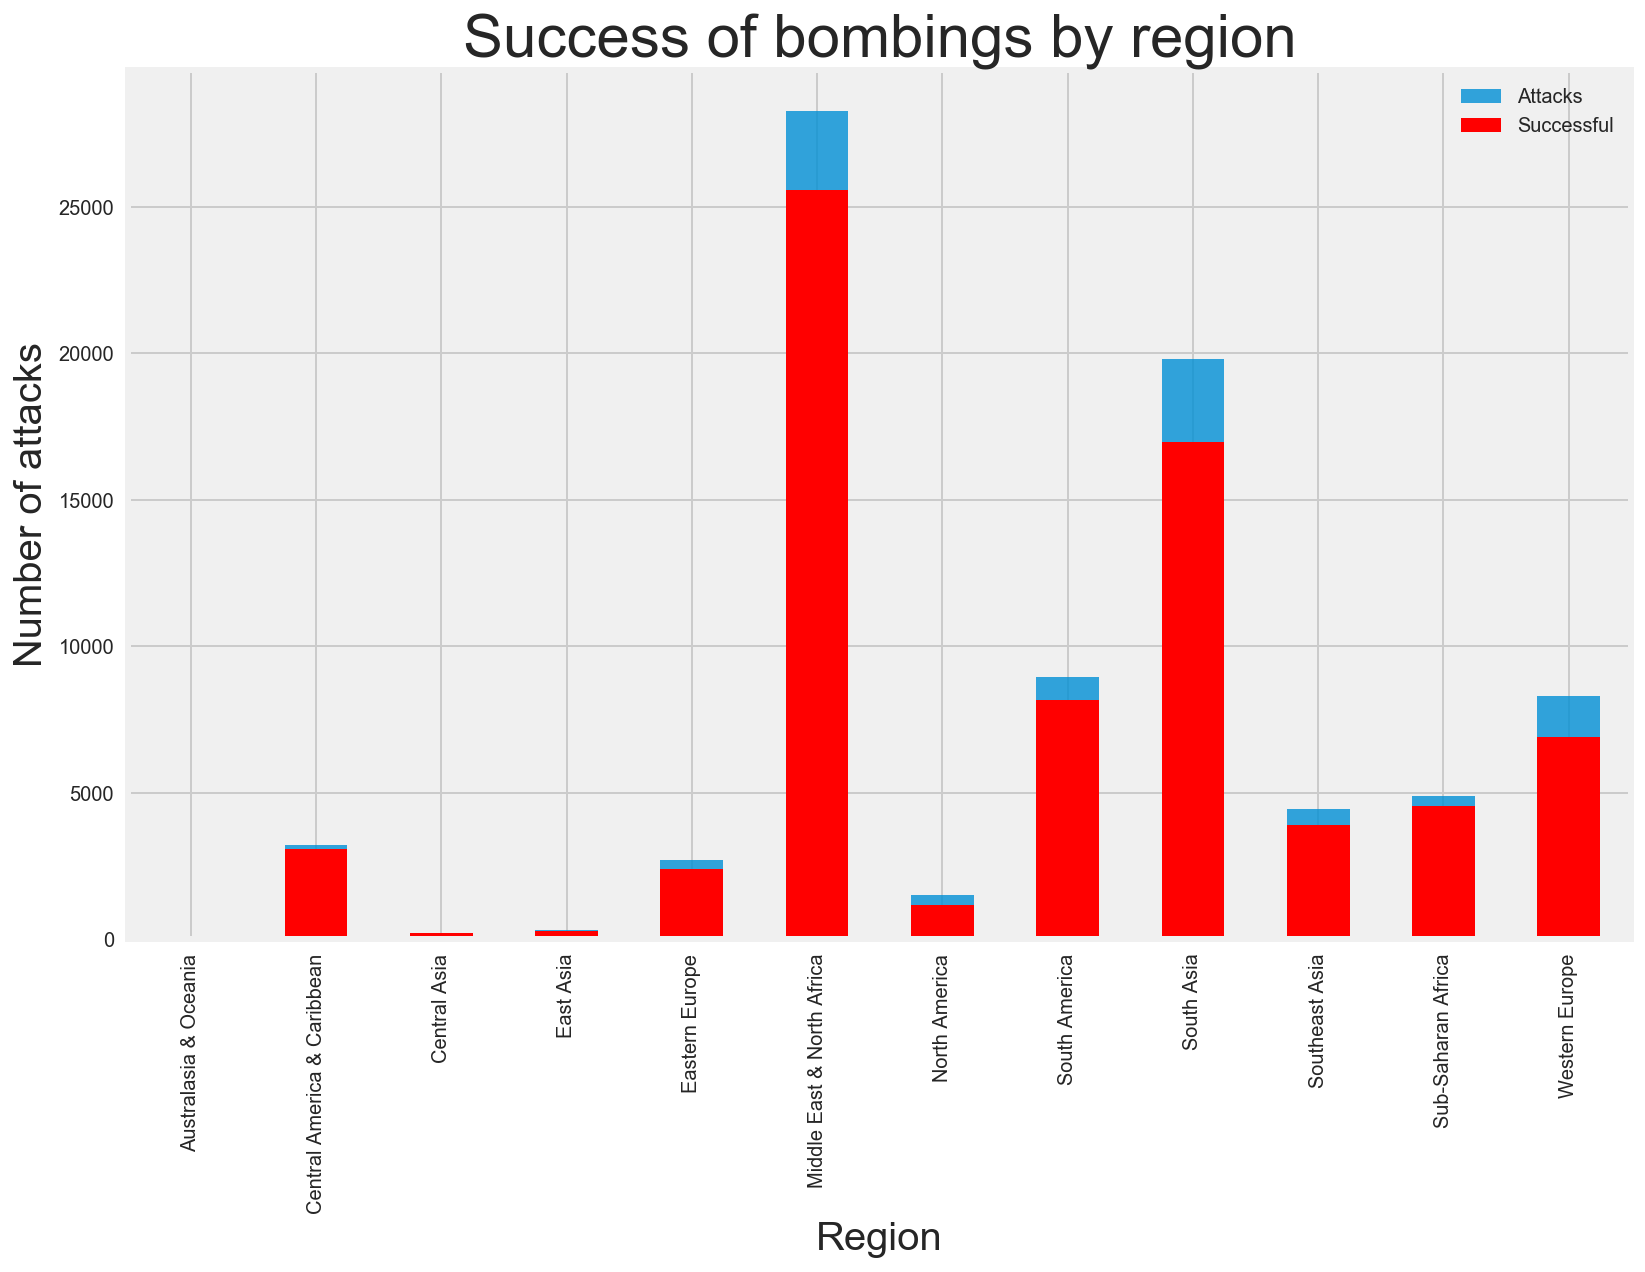

In [689]:
## Successful bombings by region, plotted.
bombings.groupby('region_txt').success.count().plot(kind='bar', alpha=0.8, label='Attacks')
bombings.groupby('region_txt').success.sum().plot(kind='bar', color='r', label='Successful')
plt.title('Success of bombings by region', fontsize=30)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Number of attacks', fontsize=20)
plt.legend()
plt.savefig('Success-of-bombings-by-region')

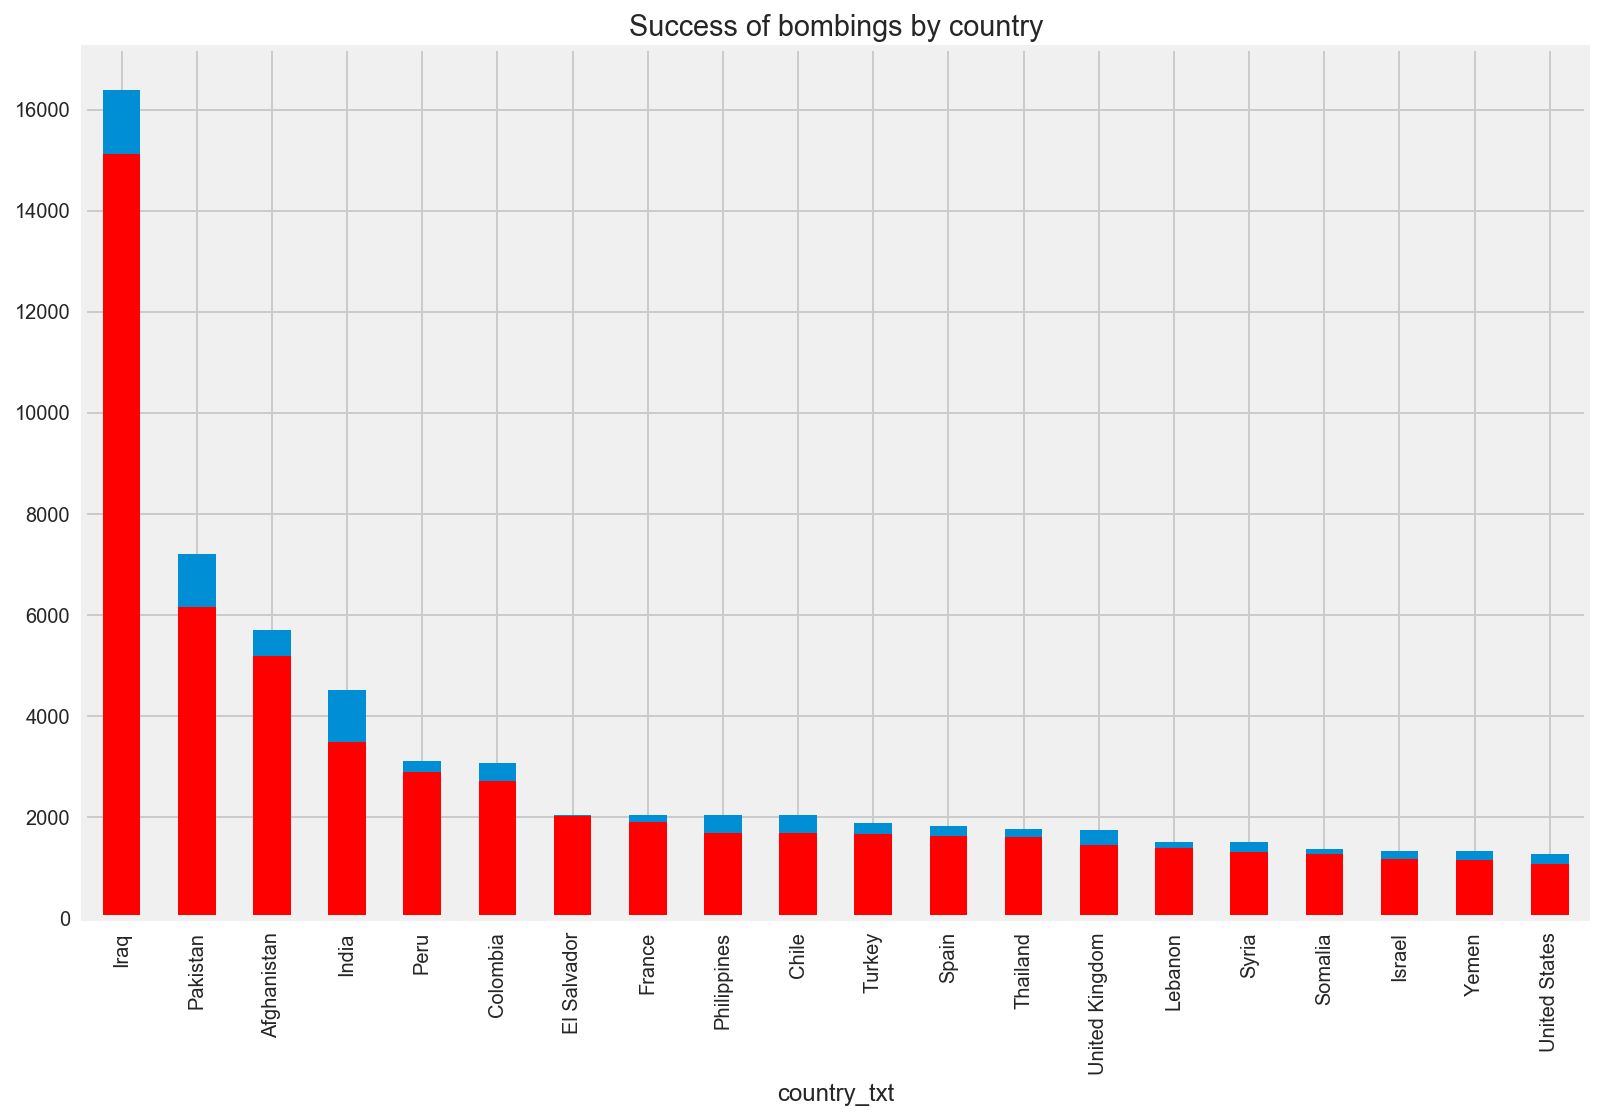

In [513]:
## Successful bombings by country, plotted.
bombings.groupby('country_txt').success.count().sort_values(ascending=False).head(20).plot(kind='bar')
bombings.groupby('country_txt').success.sum().sort_values(ascending=False).head(20).plot(kind='bar', color='r', title='Success of bombings by country')

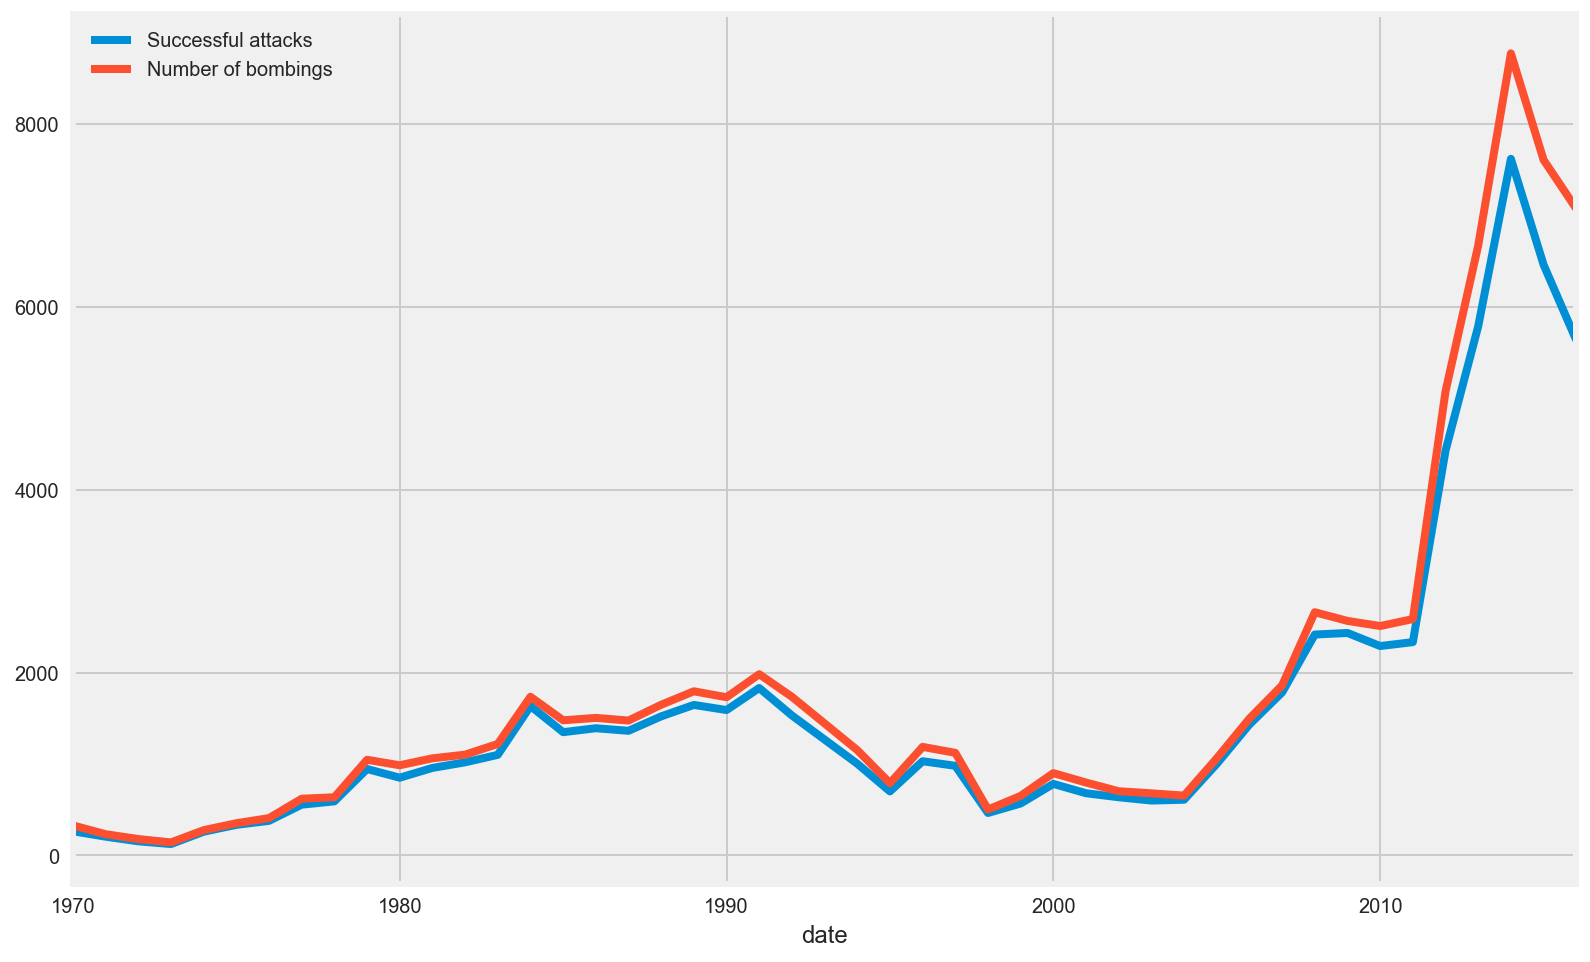

In [514]:
## Bombings plotted, with success rates. 
bombings.groupby(bombings.index.year).success.sum().plot(kind='line', label='Successful attacks')
bombings.groupby(bombings.index.year).success.count().plot(kind='line', label='Number of bombings')
plt.legend()

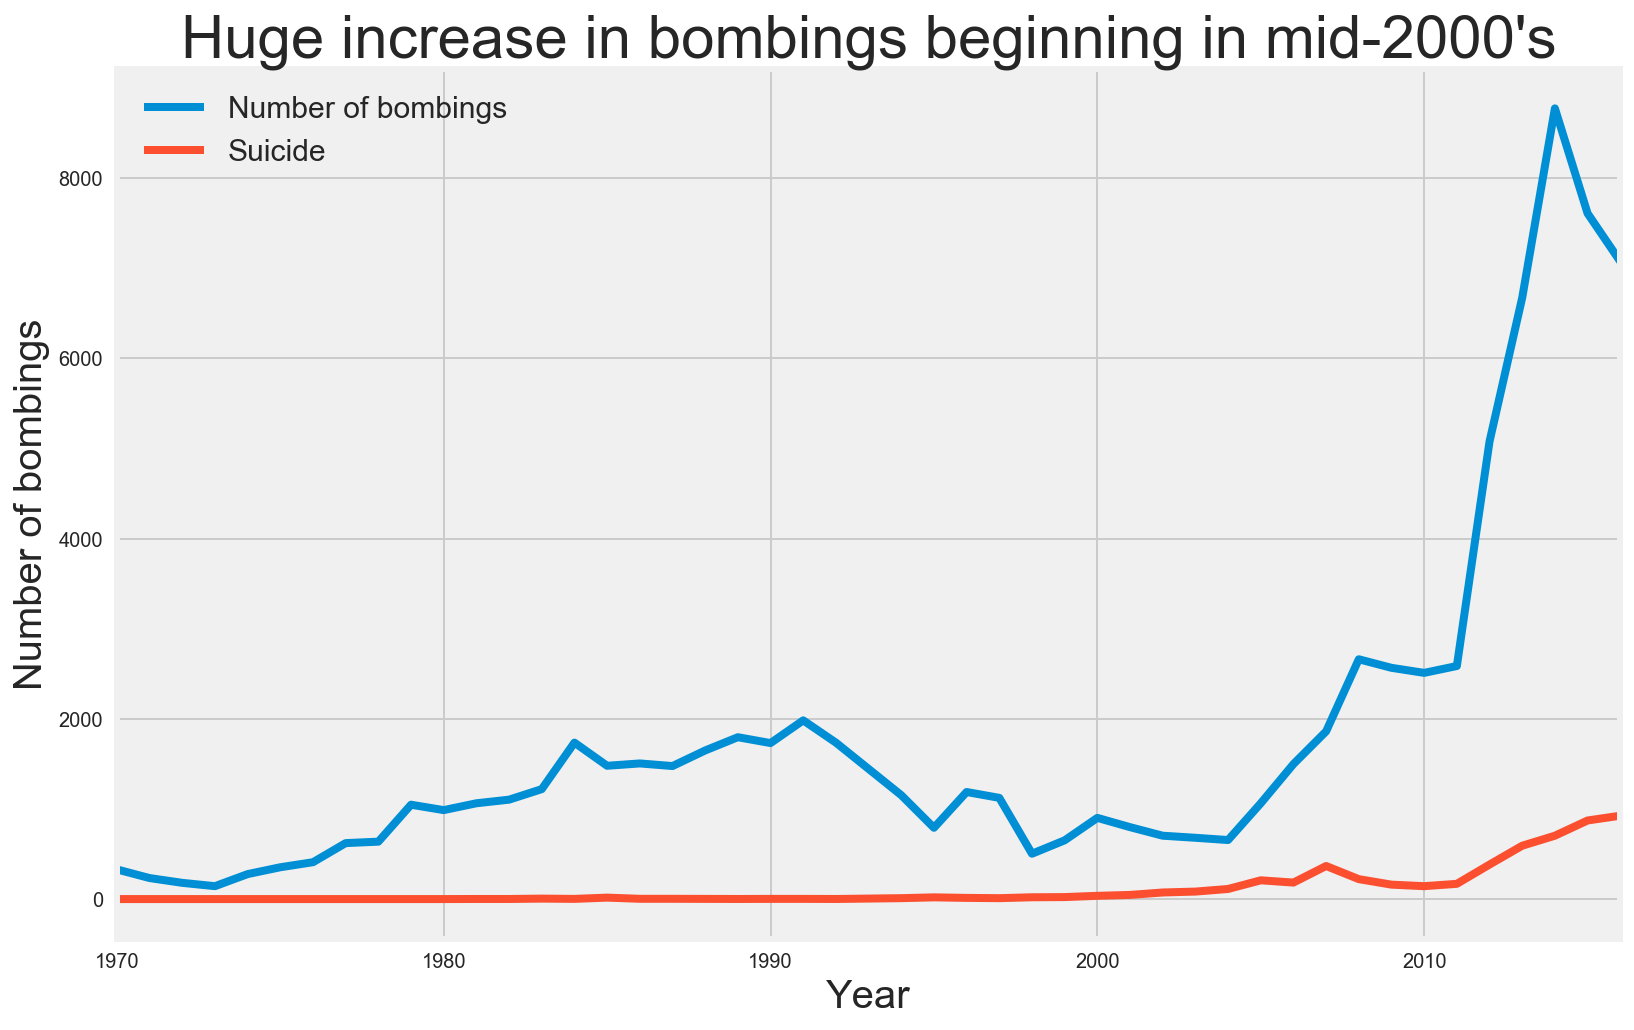

In [690]:
## Number of attacks and number of suicides.
bombings.groupby(bombings.index.year).success.count().plot(kind='line', label='Number of bombings')
bombings.groupby(bombings.index.year).suicide.sum().plot(kind='line', label='Suicide')
plt.title('Huge increase in bombings beginning in mid-2000\'s', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of bombings', fontsize=20)
plt.legend(fontsize=15)
plt.savefig('Bombings-and-suicides-by-year')

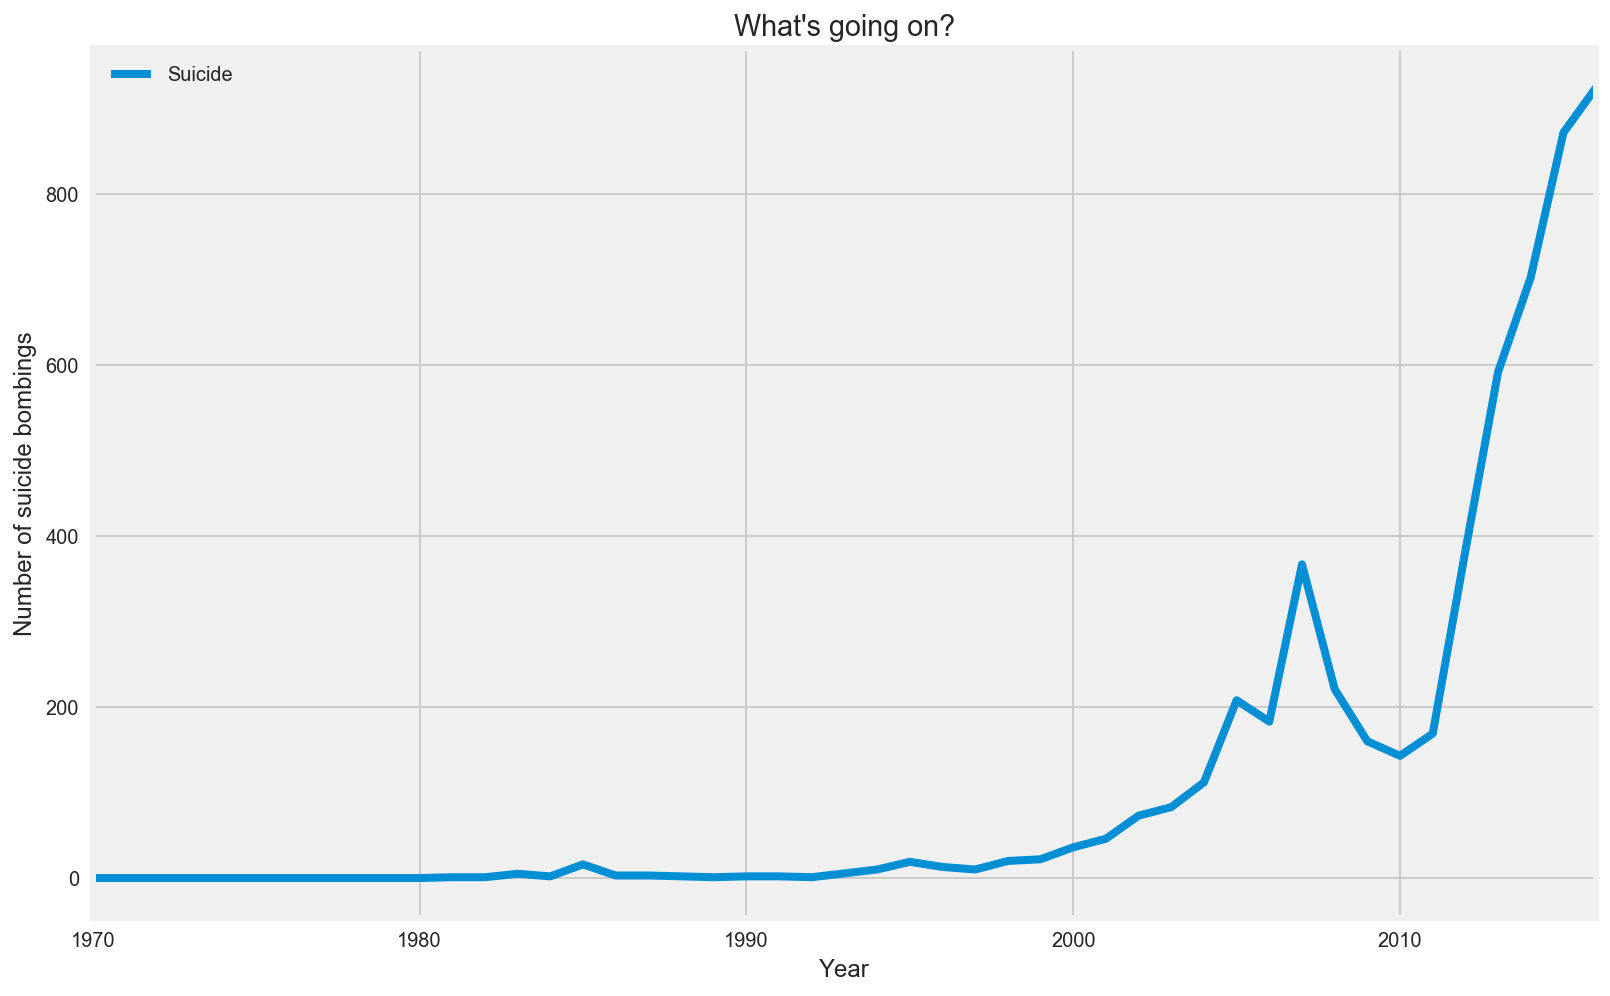

In [407]:
## Number of suicides, by year.
bombings.groupby(bombings.index.year).suicide.sum().plot(kind='line', label='Suicide')
plt.title('What\'s going on?')
plt.xlabel('Year')
plt.ylabel('Number of suicide bombings')
plt.legend(loc='upper left')

## Part 2: Bayesian Inference

Is the number of attacks that occurred in Israel significantly different before and after I went there to study?

In [ ]:
import pymc3 as pm

In [657]:
## Filter dataframe to israel.
israel = bombings[bombings.country_txt == 'Israel']

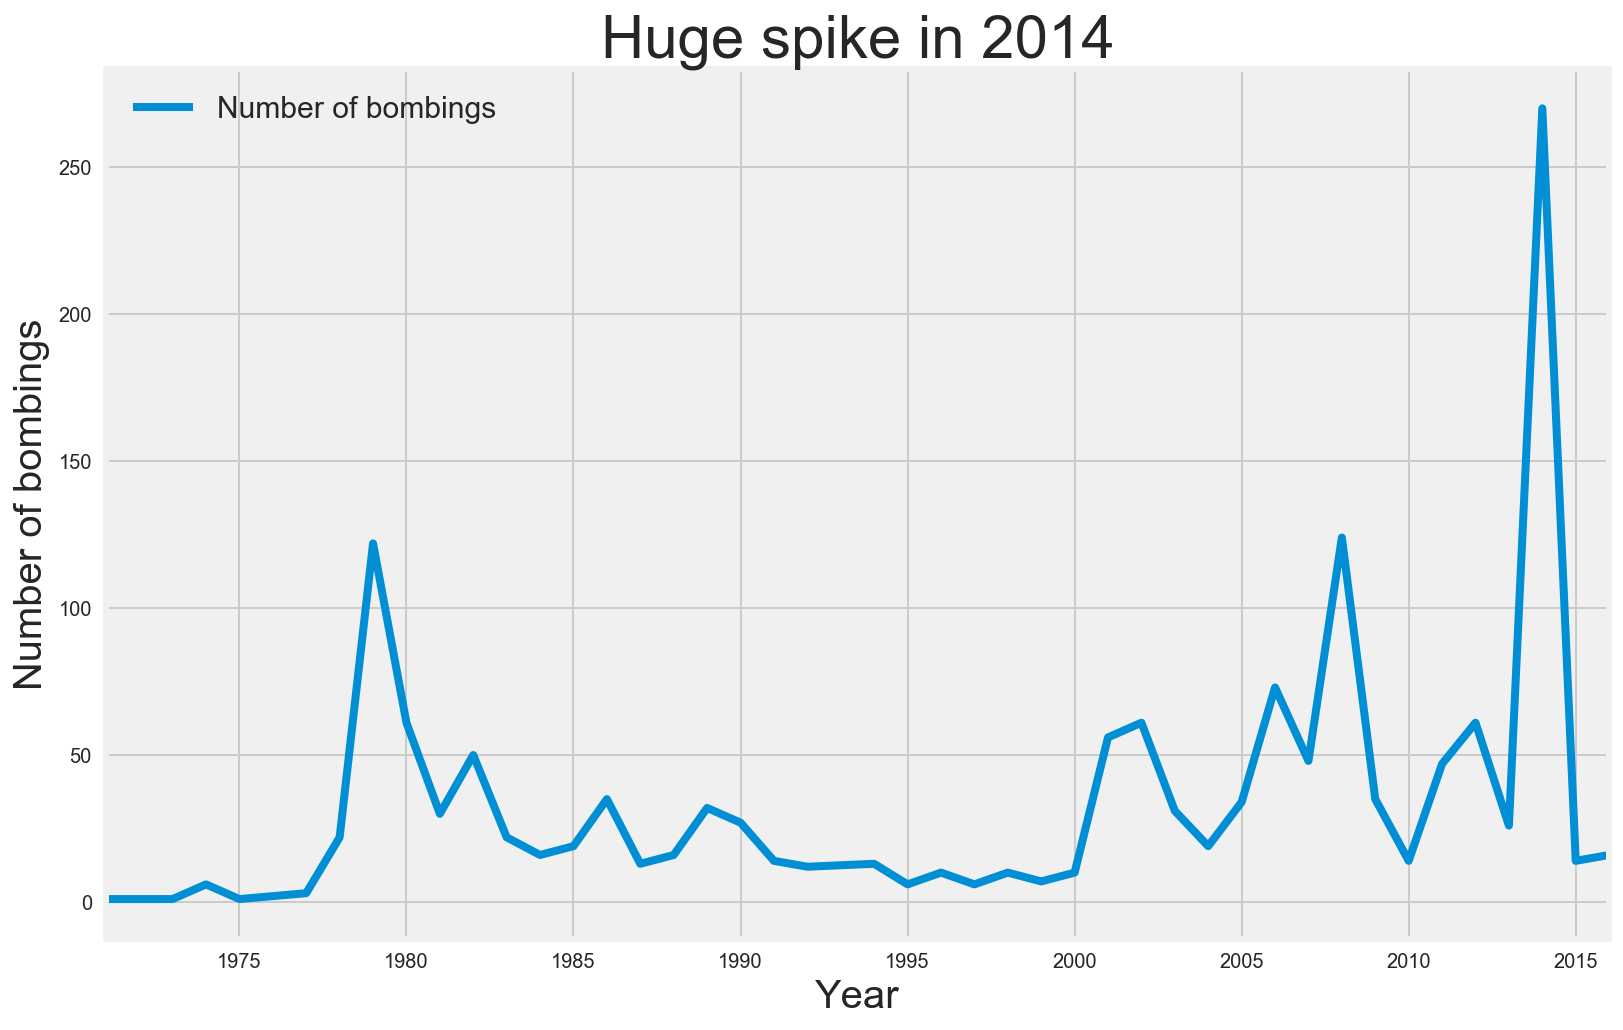

In [691]:
## Count of attacks.
israel.groupby(israel.index.year).success.count().plot(kind='line', label='Number of bombings')
plt.title('Huge spike in 2014', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of bombings', fontsize=20)
plt.legend(fontsize=15)
plt.savefig('Israel-bombings')

In [637]:
## Set prior mean and standard deviation. 
prior_mean = israel.groupby(israel.index.year).success.count().values.mean()
prior_std = israel.groupby(israel.index.year).success.count().values.std()

In [620]:
## Filtered the DF to pre and post my presence in Israel.
pre_chaim = bombings[(bombings.country_txt == 'Israel') & (bombings.index.year < 2011)]
post_chaim = bombings[(bombings.country_txt == 'Israel') & (bombings.index.year >= 2011)]

In [628]:
## Observed values for each time period.
pre_chaim_vals = pre_chaim.groupby(pre_chaim.index.year).success.count().values
post_chaim_vals = post_chaim.groupby(post_chaim.index.year).success.count().values

In [638]:
## Instantiate model, and set all these distributions.
with pm.Model() as model:

    pre_chaim_mean = pm.Normal('pre_chaim_mean', prior_mean, sd=prior_std)
    post_chaim_mean = pm.Normal('post_chaim_mean', prior_mean, sd=prior_std)

In [639]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    pre_chaim_std = pm.Uniform('pre_chaim_std', lower=std_prior_lower, upper=std_prior_upper)
    post_chaim_std = pm.Uniform('post_chaim_std', lower=std_prior_lower, upper=std_prior_upper)

In [640]:
## Setting up to compute the likelihood.
with model:

    pre_chaim_lik = pm.Normal('pre_chaim_lik', mu=pre_chaim_mean, sd=pre_chaim_std, observed=pre_chaim_vals)
    post_chaim_lik = pm.Normal('post_chaim_lik', mu=post_chaim_mean, sd=post_chaim_std, observed=post_chaim_vals)

In [641]:
with model:

    diff_of_means = pm.Deterministic('difference of means', pre_chaim_mean - post_chaim_mean)
    diff_of_stds = pm.Deterministic('difference of stds', pre_chaim_std - post_chaim_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((pre_chaim_std**2 + post_chaim_std**2) / 2))

In [651]:
import time
t0 = time.time()
with model:
    trace = pm.sample(25000, njobs=4)
t1 = time.time()

print t1 - t0

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 231.72:   5%|▌         | 10567/200000 [00:01<00:32, 5890.67it/s]
Convergence archived at 11100
Interrupted at 11,100 [5%]: Average Loss = 236.21
 98%|█████████▊| 24941/25500 [04:00<00:06, 87.78it/s] /Users/chaimgluck/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 1 contains 7 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 25490/25500 [04:04<00:00, 167.12it/s]/Users/chaimgluck/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 0 contains 9 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 25500/25500 [04:04<00:00, 104.30it/s]
/Users/chaimgluck/anaconda/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarni

263.307854891


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x22fe146d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x23cbf58d0>]], dtype=object)

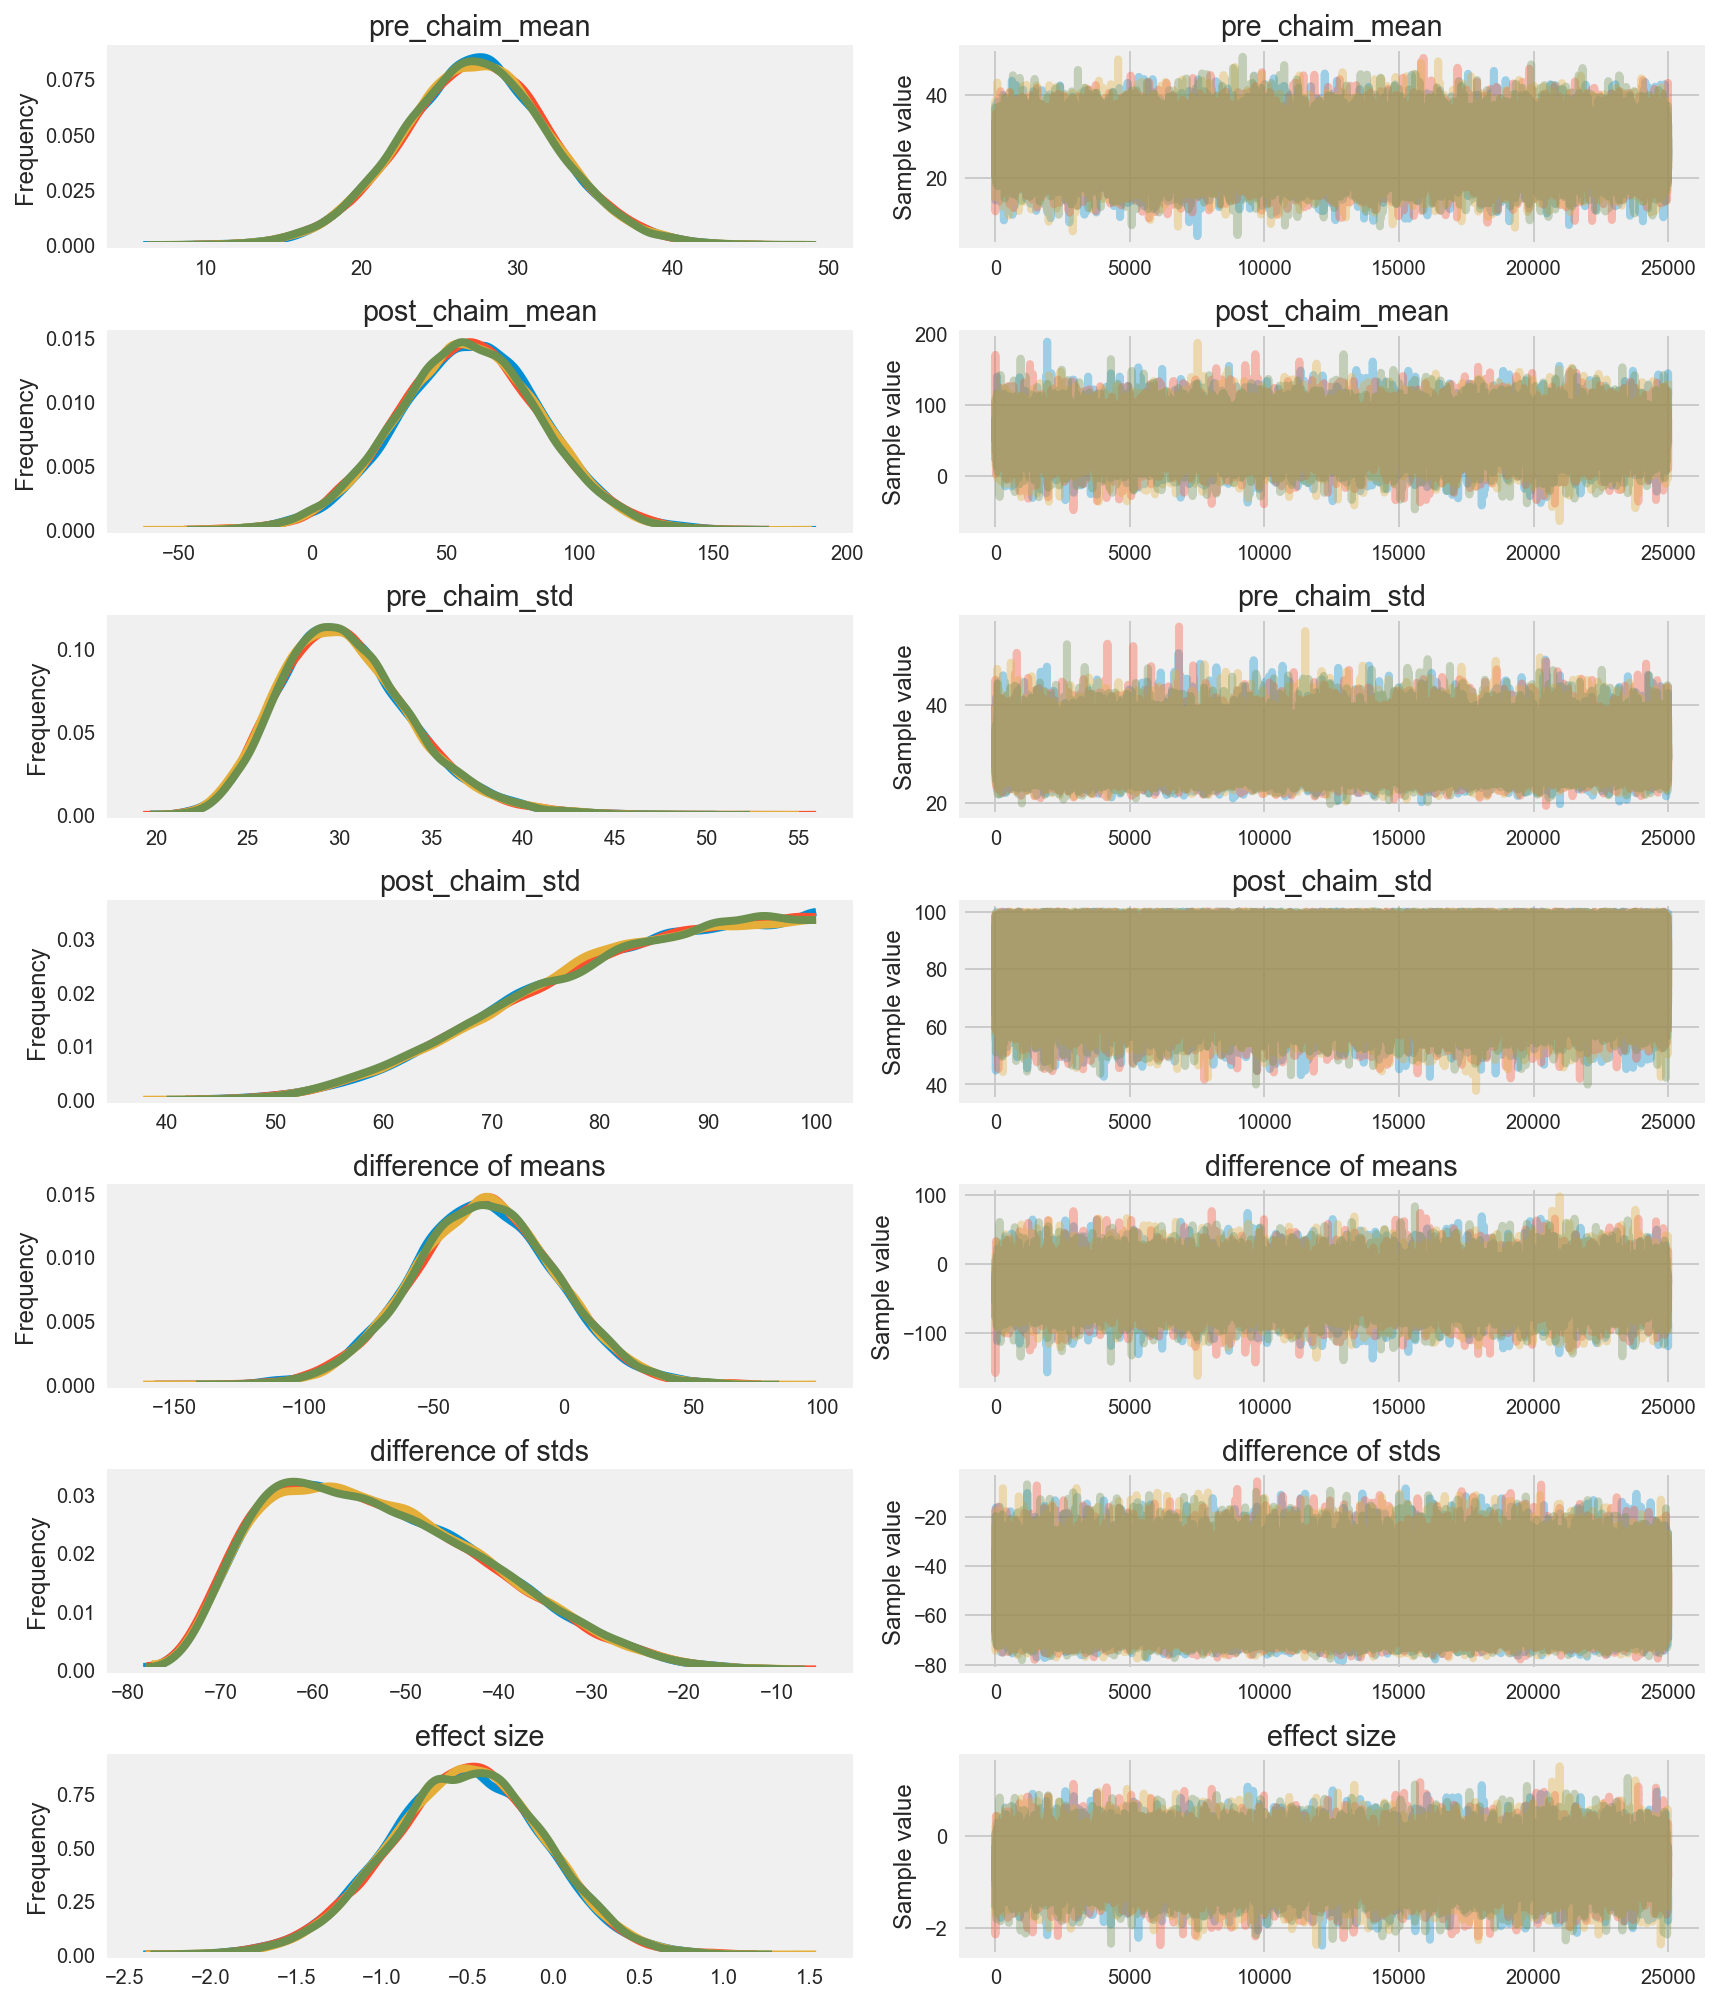

In [652]:
pm.traceplot(trace)

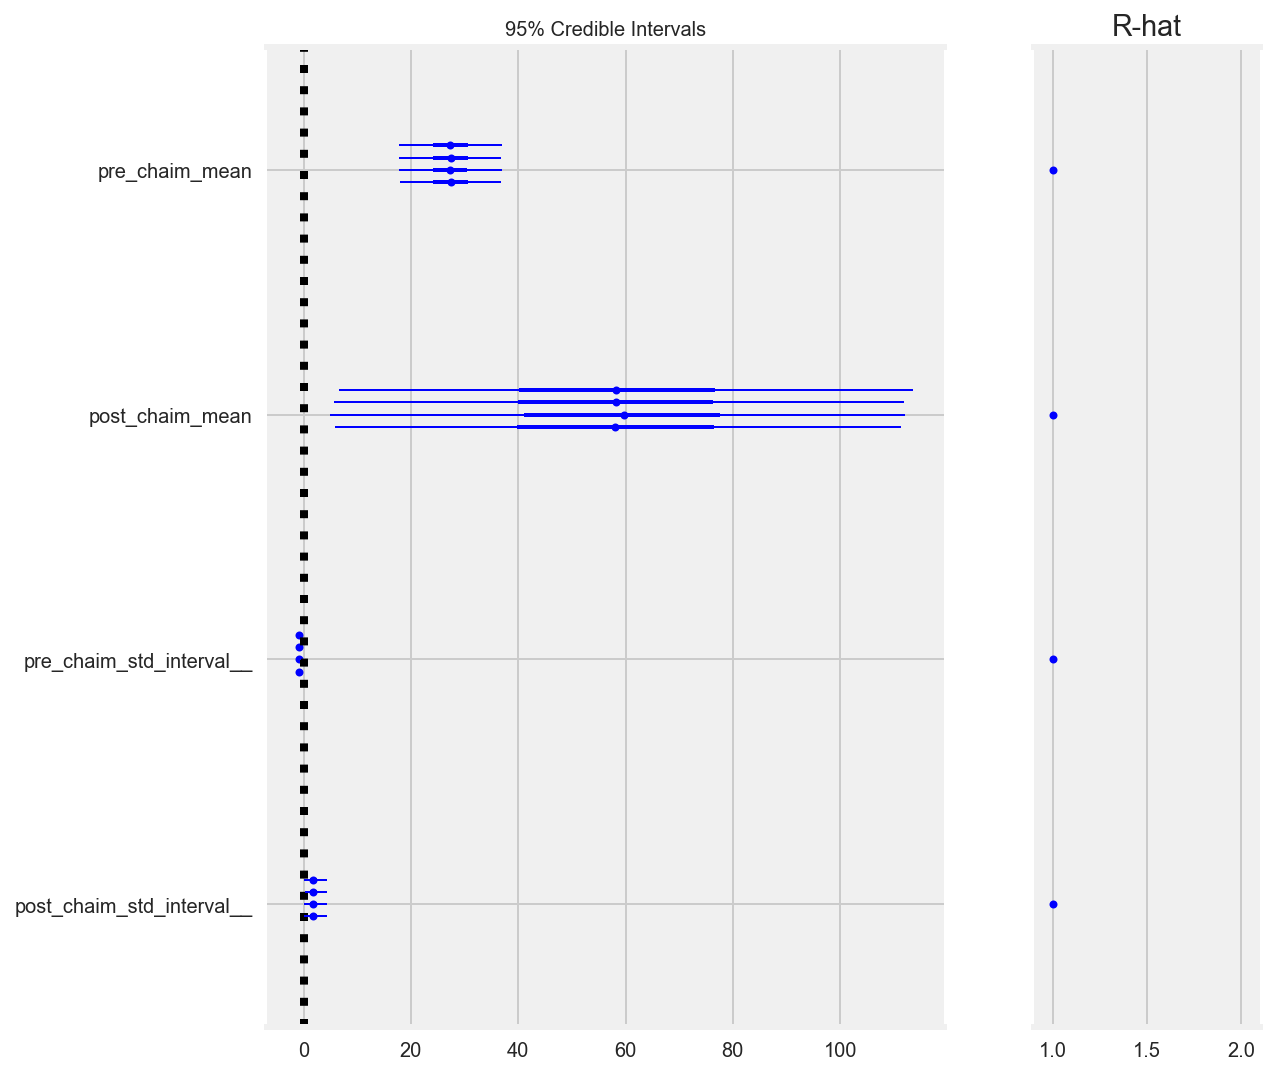

In [653]:
pm.forestplot(trace[3000:], varnames=[v.name for v in model.vars])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x237b67710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x23559c090>], dtype=object)

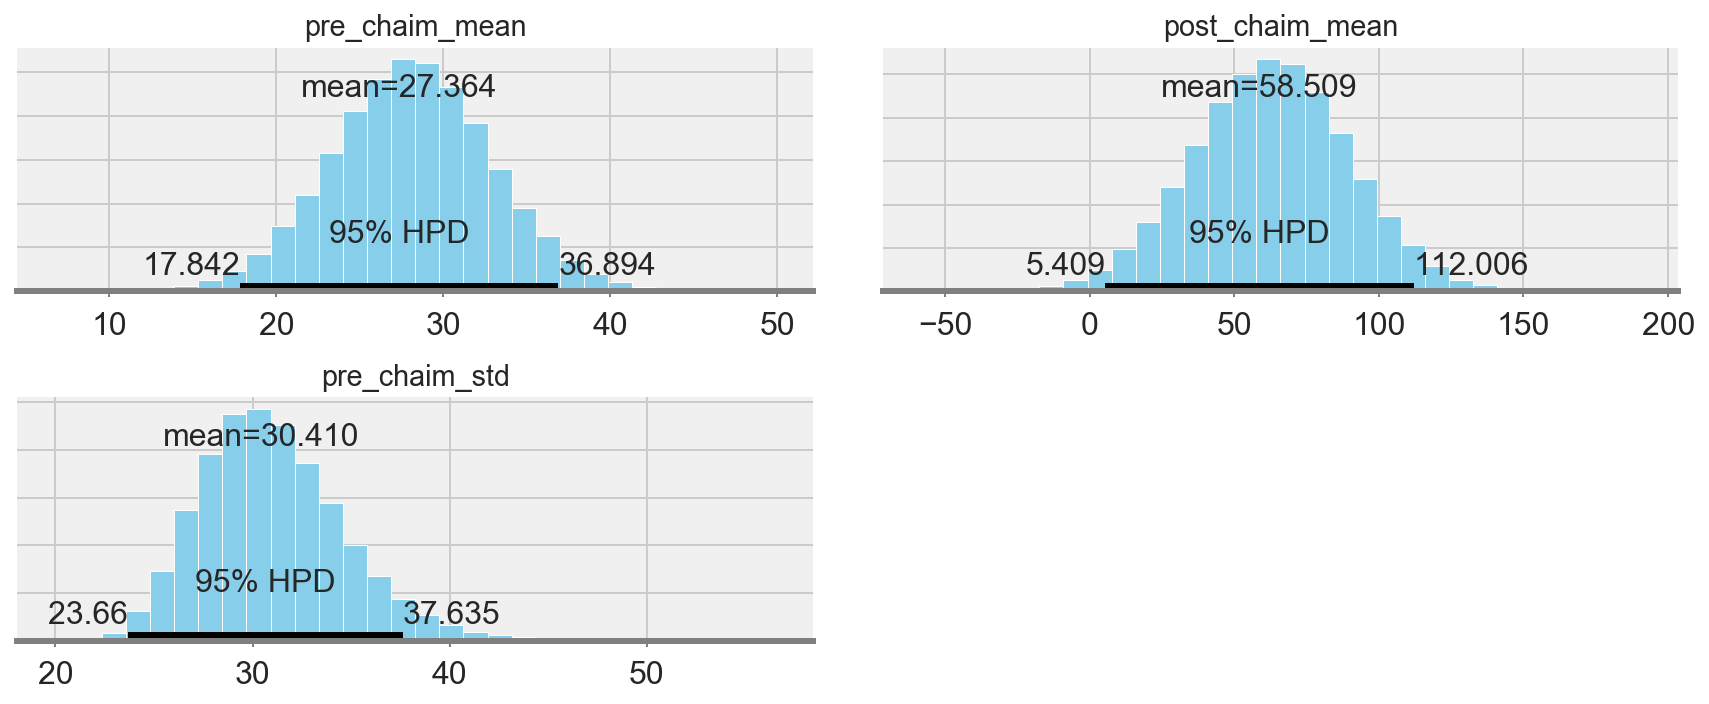

In [654]:
## Posterior distribution of means is not statistically significant.
pm.plot_posterior(trace[3000:],
                  varnames=['pre_chaim_mean', 'post_chaim_mean', 'pre_chaim_std', 'pre_chaim_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x236581fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x22fce0dd0>], dtype=object)

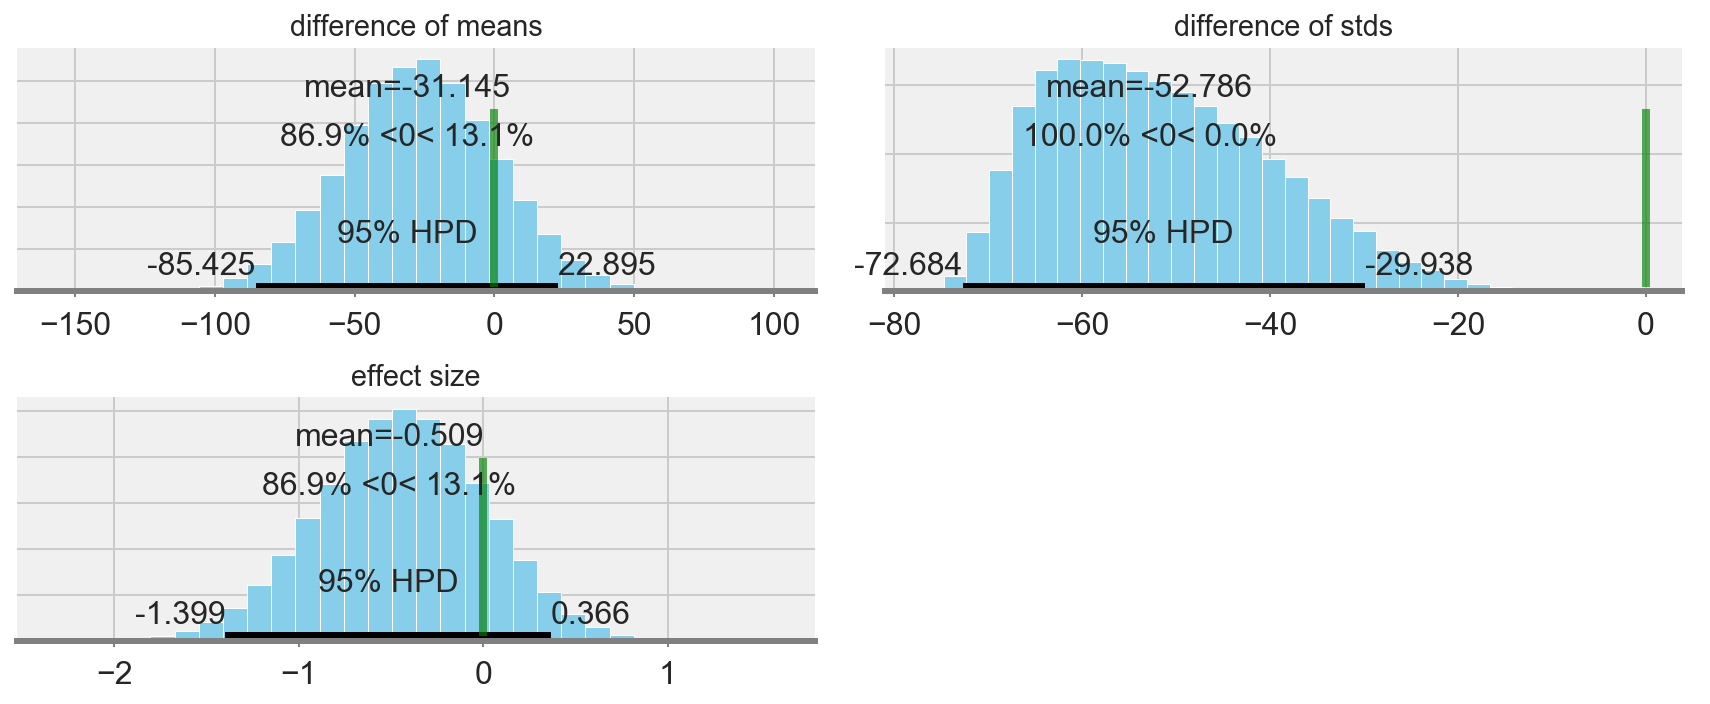

In [655]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [656]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -31.145          27.677           0.271            [-85.425, 22.895]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -85.257        -49.667        -31.253        -12.643        23.092


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -52.786          11.868           0.050            [-72.684, -29.938]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -71.134        -62.240        -54.184        -44.621        -27.347


effect size:

  Mean             SD               MC Error         9

## Part 3: 1993

After examining the number of attacks for the different regions for the two years before and after 1993, I saw that each region seemed to follow a pretty basic pattern. Attacks were on the rise, on the fall, or about steady. As such, I decided to average out the four years surrounding 1993 to come up with an estimate for 1993. I chose to do that over just the adjacent two years to smooth out the predictions into a more random, and therefore real, prediction. 

In [519]:
before_93 = bombings[bombings.index.year < 1993]
after_93 = bombings[bombings.index.year > 1993]

In [571]:
## Filtered out these years, counted by region, and created DF's out of them.
reg_91 = before_93['1991'].groupby('region_txt').success.count().to_frame(name=1991)
reg_92 = before_93['1992'].groupby('region_txt').success.count().to_frame(name=1992)
reg_94 = after_93['1994'].groupby('region_txt').success.count().to_frame(name=1994)
reg_95 = after_93['1995'].groupby('region_txt').success.count().to_frame(name=1995)

In [601]:
## Combined all those for this lovely representation of the yearly attacks.
reg_90s = pd.concat([reg_91, reg_92, reg_94, reg_95], axis=1).fillna(0).transpose()
reg_90s

,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
1991,3.0,293.0,2.0,6.0,38.0,267.0,13.0,687.0,208.0,80.0,45.0,341.0
1992,0.0,74.0,24.0,22.0,39.0,253.0,5.0,689.0,130.0,97.0,96.0,307.0
1994,4.0,71.0,26.0,6.0,48.0,292.0,19.0,180.0,135.0,49.0,79.0,244.0
1995,1.0,30.0,13.0,11.0,32.0,176.0,17.0,82.0,175.0,75.0,55.0,124.0


In [1]:
reg_90s

NameError: name 'reg_90s' is not defined

In [608]:
## The predictions. An average of the years surrounding it, two on each side.

regional_predictions_1993 = reg_90s.apply(np.mean, axis=0).to_frame(name='1993_preds').transpose()
regional_predictions_1993

,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
1993_preds,2.0,117.0,16.25,11.25,39.25,247.0,13.5,409.5,162.0,75.25,68.75,254.0


In [696]:
## The predicted number for all the regions combined.
regional_predictions_1993.values.sum()

1415.75

In [706]:
success_rates_by_region = pd.crosstab(bombings.region_txt, bombings.success, normalize='index').transpose().iloc[1].to_frame().transpose()

In [711]:
pred_success = pd.DataFrame(regional_predictions_1993.values * success_rates_by_region.values)

In [715]:
pred_success.sum(axis=1)

0    1260.515791
dtype: float64

## Part 4: Methods

#### Bayesian Inference:
For this portion of the project, I elected to go with a test that is interesting to me. Did the number of bombings in Israel differ significantly before I came there and after? I began studying there in 2011, and stayed there until 2016. For the purposes of this test, I examined the periods before 2011, and compared them to the periods after. I had noticed a large spike of attacks in the dataset in 2014, and I was curious to see how that would play out in the significance of the change. 

For the prior, I decided to use the average yearly number of attacks for Israel through the whole dataset. The prior is a representation of the probability of the outcome occurring independent of the data. The best representation of that is the average for any given year, independent of trends and patterns.  
I do think that the results would have been different had I chosen a different prior. If I had chosen just the years before 2011, that would have left out the big spike in 2014, which may have changed my results. They likely would have been more significant. As it is, my results were not statistically significant, which I have to say, is quite a relief. 

#### 1993: 
After giving the problem some thought, and having had a look at the data, I decided to approach this problem from a regional perspective. The difference in the number of attacks in different regions is quite large, and so I decided the responsible thing to do would be to proceed regionally. It just doesn't make sense to give an equal share to the Pacific Islands if they only have a few incidents every year. So I took a look at the number of attacks by region for the four years surrounding our missing 1993. That is, 1991, 92, 94, and 95. After I succeeded in getting those numbers next to each other, it was clear that for those years, there were regional patterns of change every year that didn't appear too drastic. I decided to average out those four surrounding years by region and use that value as the predicted value for 1993. I could have used just 92 and 94, but I decided it would be better to use all of them. It seemed to allow for more randomness, and in this situation with events that are by their very nature unexpected, a more random, smoothed prediction seemed appropriate.

Doing this prediction with regional values afforded me with more flexibility to impute the missing values. In the future, I would like to break it up further, perhaps by country, and see if that gives further insight.

The predictions for each of the regions for 1993 can be found just above here, and the total predicted number of bombings for the year was 1,416.

I also computed the success rates of attack for each region. I multiplied my predictions by the success rate to come up with an additional predicted successful attacks statistic. That comes out to 1261 successful attacks.